# Introducción

Este proyecto de deep learning se centra en analizar las lesiones que han sufrido jugadores de la NFL por un determinado periodo de tiempo, según variables específicas, como la temporada (año) en que sucedió la lesión, el tipo de lesión, contexto o escenario bajo el que sucedió la lesión, el periodo de la temporada donde sucedió la lesión y el conteo de cuántas lesiones hubo de cada tipo en los distintos años del dataset.

El objetivo es construir un modelo de deep learning que prediga la cantidad de lesiones que se podrían sufrir en función de las características disponibles en el dataset. Esto podría ayudar a identificar situaciones o temporadas de la NFL donde se prevea riesgo alto de lesiones basado en las predicciones sobre la posible cantidad de lesiones para que esto pueda ayudar a que se tomen o propongan medidas para reducir las lesiones que sufren los jugadores de la NFL a lo largo de cada temporada, la cual parece ir aumentando su número de semanas conforme pasa el tiempo, lo cual aumenta el riesgo de lesiones para los jugadores de todos los equipos ya que cada vez tienen que jugar más partidos.

Para esto, se utilizará un modelo de regresión de deep learning, construyendo una arquitectura de red neuronal convolucional (CNN) que buscará minimizar el error medio absoluto (MAE) entre las predicciones del modelo y los datos reales de lesiones.

Primero, declaro las librerías básicas que voy a usar

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Luego, aquí leo el dataset que voy a usar

In [125]:
df_lesiones = pd.read_csv('NFL_lesiones.csv')
df_lesiones.head()

,index,Year,Injury Type,Scenario,Season Type,Injuries
0,0,2012,Concussion,Practice,Preseason,42
1,1,2013,Concussion,Practice,Preseason,39
2,2,2014,Concussion,Practice,Preseason,42
3,3,2015,Concussion,Practice,Preseason,29
4,4,2016,Concussion,Practice,Preseason,26


Este dataset obtenido de kaggle, aborda el grave y cada vez más preocupante tema de las lesiones de jugadores de la NFL, el cual sigue siendo uno de los temas más preocupantes para la liga hasta hoy en día. El dataset ofrece datos sobre el año, tipo, escenario y periodo de la temporada en que suceden las lesiones (en este caso entre las temporadas de 2012 a 2017), así como la cantidad de lesiones de cada tipo, escenario y periodo en cada uno de los años que aborda el dataset.

Tras leer el dataset, veo que tiene una columna que se llama 'index', que realmente no es necesario tenerla porque el index ya está a la izquierda de todo el dataset por default por así decirlo. Así que la voy a eliminar:

# Dataset de NFL

In [126]:
df_lesiones.drop('index', axis=1, inplace=True)
df_lesiones

,Year,Injury Type,Scenario,Season Type,Injuries
0,2012,Concussion,Practice,Preseason,42
1,2013,Concussion,Practice,Preseason,39
2,2014,Concussion,Practice,Preseason,42
3,2015,Concussion,Practice,Preseason,29
4,2016,Concussion,Practice,Preseason,26
...,...,...,...,...,...
103,2013,MCL Tear,Game,Full Season,115
104,2014,MCL Tear,Game,Full Season,125
105,2015,MCL Tear,Game,Full Season,155
106,2016,MCL Tear,Game,Full Season,125


In [127]:
df_lesiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         108 non-null    int64 
 1   Injury Type  108 non-null    object
 2   Scenario     108 non-null    object
 3   Season Type  108 non-null    object
 4   Injuries     108 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.3+ KB


Aquí se puede ver que la columna de 'Year' tiene los años a los que pertenecen las distintas temporadas de la NFL que abarca este dataset (valores numéricos discretos, o 'int'), la de 'Injury Type' tiene definidos en texto los tipos de lesión que se registraron en este dataset (texto, o en este caso 'object'), la de 'Scenario' tiene el contexto donde sucedió cada lesión, ya sea entrenando o en partido (texto, o en este caso 'object'), la de 'Season Type' define en texto el periodo (pre-temporada, temporada regular, etc) de la temporada en el que sucedió cada lesión (texto, o en este caso 'object), y finalmente la de 'Injuries' tiene la cantidad de lesiones registradas (valores numéricos, o 'int') en cada año considerando cada una de las variables en formato de texto.

Dimensiones del dataset:

In [128]:
df_lesiones.shape

(108, 5)

Ahora voy a ver si hay valores nulos para eliminarlos:

In [129]:
df_lesiones.isna().sum().sum()

0

Veo que no hay ningún valor nulo. Ahora si ya puedo comenzar con el proyecto. Primero voy a usar value_counts() para ver las diferencias de valores que tienen los datos de cada una de las columnas.

# Ver y explorar las columnas

In [130]:
df_lesiones['Year'].value_counts()

,count
Year,
2012,18
2013,18
2014,18
2015,18
2016,18
2017,18


En el dataset hay datos para 6 temporadas de la NFL (de 2012 a 2017)

In [131]:
df_lesiones['Injury Type'].value_counts()

,count
Injury Type,
Concussion,36
ACL Tear,36
MCL Tear,36


Hay 3 diferentes tipos de lesiones en los jugadores a lo largo de estos 6 años.

In [132]:
df_lesiones['Scenario'].value_counts()

,count
Scenario,
Practice,54
Game,54


Los posibles escenarios para las lesiones de los jugadores son en entrenamientos o en los partidos.

In [133]:
df_lesiones['Season Type'].value_counts()

,count
Season Type,
Preseason,36
Regular + Postseason,36
Full Season,36


Aquí se puede ver en qué partes de la temporada suceden las lesiones.

In [134]:
df_lesiones['Injuries'].describe()

,Injuries
count,108.000000
mean,51.444444
std,59.480670
min,0.000000
25%,14.500000
50%,26.500000
75%,47.000000
max,241.000000


Aquí con el describe() puedo ver algunas estadísticas sobre las lesiones (columna de injuries) para darme una idea de lo que contiene la columna.

# Procesamiento de datos

In [135]:
df_lesiones['Scenario'] = df_lesiones['Scenario'].replace({'Practice': 0, 'Game': 1})
df_lesiones = pd.get_dummies(df_lesiones, columns=['Injury Type', 'Season Type'])

<ipython-input-135-496aaf1d291e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_lesiones['Scenario'] = df_lesiones['Scenario'].replace({'Practice': 0, 'Game': 1})


Se definen las lesiones en entrenamiento como 0 y las de partido como 1 para poder tenerlo en forma numérica para que funcione bien el modelo.

In [136]:
df_lesiones = df_lesiones.replace({False: 0, True: 1})
df_lesiones.head()

<ipython-input-136-3b8aaff65bdf>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_lesiones = df_lesiones.replace({False: 0, True: 1})


,Year,Scenario,Injuries,Injury Type_ACL Tear,Injury Type_Concussion,Injury Type_MCL Tear,Season Type_Full Season,Season Type_Preseason,Season Type_Regular + Postseason
0,2012,0,42,0,1,0,0,1,0
1,2013,0,39,0,1,0,0,1,0
2,2014,0,42,0,1,0,0,1,0
3,2015,0,29,0,1,0,0,1,0
4,2016,0,26,0,1,0,0,1,0


Se hace one-hot encoding en las columnas que tienen varios counts de valores en forma de texto para dejarlos en forma numérica con unos y ceros para que coincida con el resto del dataset y lo que se hizo anteriormente. Ahora sí ya se puede proceder a entrenar el modelo.

In [137]:
df_lesiones.shape

(108, 9)

In [138]:
# Antes de hacer el modelo primero me aseguraré de que no haya valores nulos después de todo lo que hice
df_lesiones.isna().sum().sum()

0

Ahora sí, procedo a crear el modelo:

# Crear la arquitectura de capas para el modelo

In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# X y Y
X = df_lesiones.drop(columns=['Injuries'])
y = df_lesiones['Injuries']
X = X.values.reshape(-1, 1, 1, X.shape[1]) # Aqui se reforma la X para que funcione bien en el modelo CNN ya que este ocupa 4 dimensiones

# Escalar los datos numéricos en X
X_scaled = StandardScaler().fit_transform(X.reshape(-1, X.shape[-1])) # Hay que usar reshape antes de escalar para aplicar StandardScaler a cada feature
X = X_scaled.reshape(-1, 1, 1, X.shape[-1])     # Se hace reshape otra vez para regresar la X a 4 dimensiones tras el scaling

# Esta será la arquitectura:
import tensorflow as tf
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (1,1), activation='relu', input_shape=X.shape[1:])) # Establece las dimensiones a la primera capa
model.add(layers.MaxPooling2D((1,1)))
model.add(layers.Conv2D(64, (1,1), activation='relu'))
model.add(layers.MaxPooling2D((1,1)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dropout(0.3))
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dropout(0.3))
#model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='linear'))     # Aquí se usa activation = linear porque Injuries (y) no es binaria, entonces no se puede usar 'sigmoid'

# Se usa el MSE en loss porque la columna Injuries (y) no es binaria y tiene muchos posibles valores.
# Entonces se compila el modelo, para el cual la métrica de evaluación será el error medio absoluto (MAE). Entre menor sea el MAE, mejores serán las predicciones.
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Entrenar el modelo

In [140]:
# Aquí se dividen los datos en sus sets de entrenamiento, validación y testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

historial = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 4227.0005 - mae: 43.2657 - val_loss: 11576.0781 - val_mae: 71.0446
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4084.6113 - mae: 42.1019 - val_loss: 11546.9170 - val_mae: 70.8196
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4050.9277 - mae: 40.6109 - val_loss: 11518.2275 - val_mae: 70.5962
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4686.6919 - mae: 44.8813 - val_loss: 11487.2793 - val_mae: 70.3611
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3818.3877 - mae: 40.3748 - val_loss: 11454.8887 - val_mae: 70.1125
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3942.1475 - mae: 40.1402 - val_loss: 11419.4111 - val_mae: 69.8374
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4103.6797 - mae: 41.1409 - val_loss: 11378.3379 - val_mae: 69.5257
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3745.6521 - mae: 38.0364 - val_loss: 11331.8408 - val_mae: 69.1740
Epoch 9

Como se puede observar, aquí el MAE aún es muy alto, pero se ve que va bajando conforme pasan las epochs, entonces probaré aumentar el número de epochs para ver si se reduce el MAE.

In [141]:
historial = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 512.0795 - mae: 17.3531 - val_loss: 1592.2169 - val_mae: 25.7359
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 528.8520 - mae: 17.0540 - val_loss: 1518.2673 - val_mae: 25.0748
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 504.4692 - mae: 17.0769 - val_loss: 1472.2753 - val_mae: 24.5871
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 458.2798 - mae: 16.2560 - val_loss: 1444.8838 - val_mae: 24.2094
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 436.3931 - mae: 15.6979 - val_loss: 1406.0647 - val_mae: 23.8093
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 407.8649 - mae: 14.9605 - val_loss: 1353.1877 - val_mae: 23.3349
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 418.3959 - mae: 15.2573 - val_loss: 1291.8860 - val_mae: 22.8466
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 404.2789 - mae: 14.9301 - val_loss: 1238.1479 - val_mae: 22.4022
Epoch 9/500
3/3 

In [142]:
# Aquí se muestran la pérdida (que sería el loss) y el MAE que se usará para medir la precisión (entre menor sea el MAE mayor es la precisión)
loss, mae = model.evaluate(X_test, y_test)
print(f"Error medio absoluto (MAE) en el conjunto de test: {mae:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 292.3364 - mae: 10.2733
Error medio absoluto (MAE) en el conjunto de test: 10.27


Como se puede observar, aquí el MAE ya bajó notablemente (10.27) conforme al entrenamiento de solo 50 epochs, por lo que se confirma que este nuevo entrenamiento de 500 epochs tuvo una mejora considerable en la reducción del MAE. Esto ayudará a que las predicciones sean más precisas con respecto a los valores reales.

En cuanto a la implementación del modelo, utilicé una arquitectura CNN adaptada para estos datos. Para esto, tuve que hacer un reshape a los datos para ponerlos en forma de 4D para que puedan procesarse con las capas de convolución (Conv2D) y pooling (MaxPooling2D) en el modelo que creé. El modelo comienza con una capa Conv2D de 32 filtros, seguida de una de 64, ambas con una ventana (1,1), esto tuvo que ser así porque era como mejor funcionaba debido a los tipos de datos del dataset, ya que había intentado primero con ventana de (2,2) pero el de (1,1) fue mejor. Esto permitió que la red neuronal pudiera aprender de forma más adecuada para estos datos.
   
**Pooling y Flatten**: Cada capa de convolución es seguida por una capa de `MaxPooling2D` para reducir la dimensionalidad, lo cual mejora la eficiencia del modelo. Finalmente, se utiliza `Flatten()` para convertir la salida en una dimensión antes de las capas densas.

**Capas Densas y Salida**: Tras aplanar la salida de las capas de convolución, se ha incluido una capa densa con 64 unidades seguida de la capa de salida con una sola unidad (activación lineal) para predecir `Injuries`, una variable continua.

### Justificación de las decisiones del modelo

**Función de activación**: Elegí `relu` en las capas de convolución y densas debido a su buen rendimiento en redes profundas al mitigar el problema de la desaparición del gradiente y mejorar la eficiencia de cálculo.

**Inicialización de Pesos**: La inicialización de los pesos usa el método `He` (predeterminado en `relu`) en las capas convolucionales y densas. Esto es adecuado para redes profundas con `relu`, ya que permite un mejor flujo de gradientes.

**Métrica de evaluación (MAE)**: La elección de MAE como métrica es adecuada para una tarea de regresión, dado que mide directamente el error promedio en las predicciones de `Injuries`, un enfoque natural cuando se trata de predecir valores continuos.

# Predicciones

Aquí es donde haré algunas predicciones para ver si funciona bien el modelo.

In [147]:
# Primero, agarro algunas muestras del set de testing (por ejemplo aquí tomaré 10 muestras, pero pueden ser más, o menos)
muestras = 10
sample_data = X_test[:muestras]
sample_labels = y_test[:muestras]

# Ahora sí, se hacen las predicciones para estas 10 muestras que agarré
predictions = model.predict(sample_data)

# Por último, para ver que tal funciona el modelo, voy a comparar los valores reales con las predicciones que obtuve
comparar = pd.DataFrame({
    'Reales': sample_labels,
    'Predicciones': predictions.flatten()
})

print("Comparación entre los valores reales y las predicciones:")
print(comparar)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Comparación entre los valores reales y las predicciones:
    Reales  Predicciones
89      18     13.016685
69     114    109.778320
47     189    164.035248
76      33     48.485729
95      39     42.195824
11      46     47.321522
42     177    159.751297
36       3      7.263316
0       42     35.768188
77      56     49.865986


<ipython-input-148-7b74928b6f5a>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


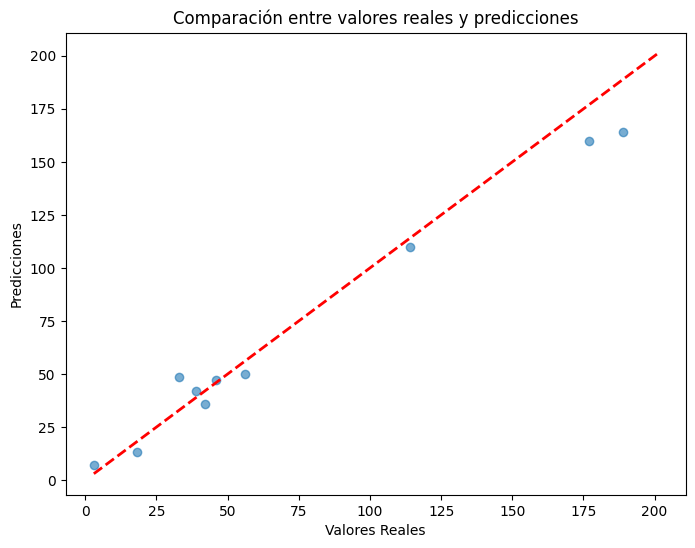

In [148]:
plt.figure(figsize=(8, 6))
plt.scatter(sample_labels, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title('Comparación entre valores reales y predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

# Interpretación de resultados y conclusiones

En este dataframe de comparación de predicciones que creé, la primera columna es la muestra, la segunda son los valores reales y la tercera son las predicciones. Esto sirve para ver una muestra de qué tanto se acercan las predicciones obtenidas en comparación con los valores reales. Entre menor sea el MAE en el conjunto de test, mejor será la precisión del modelo, y por lo tanto las predicciones estarán más cercanas a los valores reales.

En este caso, se puede observar que el MAE en el test set fue de 10.27, lo cual fue lo suficientemente bajo para ayudar a que el modelo no se desvíe mucho de los valores reales y ajuste bien, dandole una buena precisión a la hora de hacer predicciones. Se puede observar que las predicciones que se mostraron están considerablemente cerca de los valores reales, lo cual en un contexto como este sobre lesiones de la NFL, es importante que las predicciones estén notablemente cercanas a la realidad, ya que aquí se aborda un tema de mucha importancia ya que es sobre la posibilidad que los jugadores de NFL tienen de lesionarse cada vez que van a un partido o entrenamiento.

Los mismos jugadores y equipos saben de ese riesgo que siempre estará presente. Sin embargo, el poder tener algunas predicciones cercanas a lo que podría pasar es bastante útil, ya que puede ser de ayuda para que la NFL y sus equipos estén más informados y puedan tomar medidas en favor de la salud y bienestar de los jugadores, que a final de cuentas son lo más importante para cada deporte y uno de los mejores activos económicos para la NFL.